## Problem 1: Geocode shopping centers (5 points)

The overall aim of problems 1-3 is to find out **how many people live within a walking distance (1.5 km) from certain shopping centers in Helsinki**.

In problem 1 aim is to find out the addresses of shopping centers and to retreive numercal coordinates for these addresses. As an output, we will have a Shapefile called `shopping_centers.shp` which contains the geocoded result.

**Preparation:** Find out the addresses for following shopping centers from the internet, and write the addresses into a text file called `shopping_centers.txt`:

 - Itis
 - Forum
 - Iso-omena
 - Sello
 - Jumbo
 - REDI
 - Tripla 
 
 *Hint for "Tripla": This shopping center opened in October 10 2019, and if you are doing this exercise soon after that, the official address might not yet be in online databases. 
 Check for an address nearby the Pasila railway station on OpenStreetMap.org and use that as input.*

`shopping_centers.txt` should have semicolon (`;`) as a separator, and the file should include the following columns:

- ``id`` (integer) containing an unique identifier for each shopping center
- ``name`` (string) of each shopping center
- ``addr`` (string) the address 


See and example of how to format the text file [in the lesson 3 materials](https://automating-gis-processes.github.io/site/master/notebooks/L3/geocoding_in_geopandas.html). Save (and upload) the text file into your exercise repository.

- Read `shopping_centers.txt` that you just created into a pandas DataFrame called ``data``:

In [53]:
# Import modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os, sys

root = r"C:\Users\gcolm\Documents\courses\online\online_courses\others\Geo_python_course\autoGIS_2019\lesson_3\data"
# Read the data (replace "None" with your own code)
fc = 'shoppingCenters2.txt'
data = pd.read_csv(os.path.join(root, fc), sep=';')
# YOUR CODE HERE
# raise NotImplementedError()

In [16]:
#NON-EDITABLE TEST CELL
# Check your input data
print(data)

     id       name                                           addr
0  1000       Itis             Itäkatu 7, 00930 Helsinki, Finland
1  1001     Center           Kaivokatu 1, 00100 Helsinki, Finland
2  1002  Iso-omena       Piispansilta 11, 02230 Helsinki, Finland
3  1003      Sello     Leppävaarankatu 3, 02600 Helsinki, Finland
4  1004      Jumbo        Valuuttakatu 3, 01510 Helsinki, Finland
5  1005       REDI  Hermannin rantatie 5, 00580 Helsinki, Finland


- Geocode the addresses using the Nominatim geocoding service. Store the output in a variable called `geo`:

__Geocode the addresses using Nominatim__

In [17]:
# import the geocoding tool
from geopandas.tools import geocode

def geocoding(data):
    try:
        geo = geocode(data['addr'], provider='nominatim', user_agent='autogis_xx', timeout=4)
    except:

        # YOUR CODE HERE
        raise NotImplementedError()
    
    return geo

In [18]:
# %%time
geo = geocoding(data)

In [19]:
#NON-EDITABLE TEST CELL
# Check the geocoded output
print(geo)

                    geometry  \
0  POINT (25.08294 60.21170)   
1  POINT (24.94135 60.17178)   
2  POINT (24.73779 60.16294)   
3  POINT (24.81433 60.21770)   
4  POINT (24.96486 60.29219)   
5  POINT (24.97904 60.18702)   

                                             address  
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...  
1  Helsinki, 1, Kaivokatu, Keskusta, Kluuvi, Etel...  
2  Sports Academy, 11, Piispansilta, Matinkylän k...  
3  Mehiläinen Leppävaara, 3, Leppävaarankatu, Sät...  
4  Robert's Coffee, 3, Valuuttakatu, Vantaanportt...  
5  Silta, 5, Hermannin rantatie, Verkkosaari, Kal...  


In [20]:
#NON-EDITABLE TEST CELL
# Check the data type (should be a GeoDataFrame!)
print(type(geo))

<class 'geopandas.geodataframe.GeoDataFrame'>


Check that the coordinate reference system of the geocoded result is correctly defined, and **reproject the layer into ETRS GK-25** (EPSG:3879):

In [21]:
# YOUR CODE HERE
# raise NotImplementedError()

# Re-project the data to (EPSG:3879)
geo= geo.to_crs(epsg=3879)

In [22]:
#NON-EDITABLE TEST CELL
# Check layer crs
print(geo.crs)

epsg:3879


- Make a table join between the geocoded addresses (``geo``) and the original addresses (``data``) in order to link the numerical coordinates and  the `id` and `name` of each shopping center. 
- Store the output in a variable called ``geodata`` 


In [23]:
# Join the tables
geodata = None

# YOUR CODE HERE
# raise NotImplementedError()

geodata = geo.join(data)

# re-order columns
geodata = geodata[['id','name','address','addr','geometry']]

In [24]:
#NON-EDITABLE TEST CELL
# Check the join output
print(geodata.head())

     id       name                                            address  \
0  1000       Itis  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...   
1  1001     Center  Helsinki, 1, Kaivokatu, Keskusta, Kluuvi, Etel...   
2  1002  Iso-omena  Sports Academy, 11, Piispansilta, Matinkylän k...   
3  1003      Sello  Mehiläinen Leppävaara, 3, Leppävaarankatu, Sät...   
4  1004      Jumbo  Robert's Coffee, 3, Valuuttakatu, Vantaanportt...   

                                         addr  \
0          Itäkatu 7, 00930 Helsinki, Finland   
1        Kaivokatu 1, 00100 Helsinki, Finland   
2    Piispansilta 11, 02230 Helsinki, Finland   
3  Leppävaarankatu 3, 02600 Helsinki, Finland   
4     Valuuttakatu 3, 01510 Helsinki, Finland   

                           geometry  
0  POINT (25504598.602 6677662.109)  
1  POINT (25496744.578 6673212.851)  
2  POINT (25485440.532 6672255.563)  
3  POINT (25489707.583 6678342.162)  
4  POINT (25498056.327 6686627.539)  


- Save the output as a Shapefile called `shopping_centers.shp` 

In [25]:
# Define output filepath
out_fp = 'shopping_centers.shp'

# Save file
geodata.to_file(os.path.join(root, out_fp))

# YOUR CODE HERE
# raise NotImplementedError()

In [26]:
#NON-EDITABLE TEST CELL
# Print info about output file
print("Geocoded output is stored in this file:", out_fp)

Geocoded output is stored in this file: shopping_centers.shp


## Problem 2: Create buffers around shopping centers (5 points)

Let's continue with our case study and calculate a 1.5 km buffer around the geocoded points. 


- Start by creating a new column called `buffer` to ``geodata`` GeoDataFrame:

In [27]:
# YOUR CODE HERE
# raise NotImplementedError()
geodata['buffer'] = None
geodata.head()

,id,name,address,addr,geometry,buffer
0,1000,Itis,"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...","Itäkatu 7, 00930 Helsinki, Finland",POINT (25504598.602 6677662.109),None
1,1001,Center,"Helsinki, 1, Kaivokatu, Keskusta, Kluuvi, Etel...","Kaivokatu 1, 00100 Helsinki, Finland",POINT (25496744.578 6673212.851),None
2,1002,Iso-omena,"Sports Academy, 11, Piispansilta, Matinkylän k...","Piispansilta 11, 02230 Helsinki, Finland",POINT (25485440.532 6672255.563),None
3,1003,Sello,"Mehiläinen Leppävaara, 3, Leppävaarankatu, Sät...","Leppävaarankatu 3, 02600 Helsinki, Finland",POINT (25489707.583 6678342.162),None
4,1004,Jumbo,"Robert's Coffee, 3, Valuuttakatu, Vantaanportt...","Valuuttakatu 3, 01510 Helsinki, Finland",POINT (25498056.327 6686627.539),None


- Calculate a 1.5 km buffer for each geocoded point. Store the buffer geometry in the new `buffer` column.

Here, you can use the [GeoDataFrame buffer() method](http://geopandas.org/geometric_manipulations.html#GeoSeries.buffer), which uses Shapely's [buffer](http://toblerity.org/shapely/manual.html#object.buffer) in the bacground. You only need to use the `distance` -parameter, don't worry about the other parameters.

In [28]:
# YOUR CODE HERE
# raise NotImplementedError()

geodata['buffer'] = geodata.buffer(distance=1500)


In [29]:
#NON-EDITABLE TEST CELL
print(geodata.head())

     id       name                                            address  \
0  1000       Itis  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...   
1  1001     Center  Helsinki, 1, Kaivokatu, Keskusta, Kluuvi, Etel...   
2  1002  Iso-omena  Sports Academy, 11, Piispansilta, Matinkylän k...   
3  1003      Sello  Mehiläinen Leppävaara, 3, Leppävaarankatu, Sät...   
4  1004      Jumbo  Robert's Coffee, 3, Valuuttakatu, Vantaanportt...   

                                         addr  \
0          Itäkatu 7, 00930 Helsinki, Finland   
1        Kaivokatu 1, 00100 Helsinki, Finland   
2    Piispansilta 11, 02230 Helsinki, Finland   
3  Leppävaarankatu 3, 02600 Helsinki, Finland   
4     Valuuttakatu 3, 01510 Helsinki, Finland   

                           geometry  \
0  POINT (25504598.602 6677662.109)   
1  POINT (25496744.578 6673212.851)   
2  POINT (25485440.532 6672255.563)   
3  POINT (25489707.583 6678342.162)   
4  POINT (25498056.327 6686627.539)   

                               

In [30]:
#NON-EDITABLE TEST CELL
# Check the data type of the first value in the buffer-column
print(type(geodata.at[0,'buffer']))

<class 'shapely.geometry.polygon.Polygon'>


In [31]:
#NON-EDITABLE TEST CELL
# Check the areas of your buffers in km^2
print(round(gpd.GeoSeries(geodata["buffer"]).area / 1000000))

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
5    7.0
dtype: float64


- Replace the values in `geometry` column with the values of `buffer` column:

In [32]:
# YOUR CODE HERE
# raise NotImplementedError()

geodata['geometry'] = geodata['buffer']

In [33]:
#NON-EDITABLE TEST CELL
print(geodata.head())

     id       name                                            address  \
0  1000       Itis  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...   
1  1001     Center  Helsinki, 1, Kaivokatu, Keskusta, Kluuvi, Etel...   
2  1002  Iso-omena  Sports Academy, 11, Piispansilta, Matinkylän k...   
3  1003      Sello  Mehiläinen Leppävaara, 3, Leppävaarankatu, Sät...   
4  1004      Jumbo  Robert's Coffee, 3, Valuuttakatu, Vantaanportt...   

                                         addr  \
0          Itäkatu 7, 00930 Helsinki, Finland   
1        Kaivokatu 1, 00100 Helsinki, Finland   
2    Piispansilta 11, 02230 Helsinki, Finland   
3  Leppävaarankatu 3, 02600 Helsinki, Finland   
4     Valuuttakatu 3, 01510 Helsinki, Finland   

                                            geometry  \
0  POLYGON ((25506098.602 6677662.109, 25506091.3...   
1  POLYGON ((25498244.578 6673212.851, 25498237.3...   
2  POLYGON ((25486940.532 6672255.563, 25486933.3...   
3  POLYGON ((25491207.583 6678342.162, 254

Optional: at this point, you can drop out unnecessary columns from the geodataframe. In the next problem, 
we will only need these columns: `'id', 'name', 'geometry'`

In [34]:
# You can Drop the columns that you are not going to use
# geodata.drop(['address', 'addr', 'buffer'])

#Or... select the ones to keep
geodata = geodata[['id', 'name', 'geometry']] #  Keep the columns that you want to use


## Problem 3: How many people live near shopping centers? (5 points)

Last step in our analysis is to make a spatial join between our buffer layer and population data in order to find out **how many people live near each shopping center**. We will use the same data as we did during [lesson 3](https://automating-gis-processes.github.io/site/notebooks/L3/spatial-join.html#Spatial-join); **a Population Grid** that is available via the HSY wfs. 

Alternatively, you can also download the data from the [Helsinki Region Infoshare (HRI)](https://www.hsy.fi/fi/asiantuntijalle/avoindata/Sivut/AvoinData.aspx?dataID=7) as a shapefile (using wget).

The coordinate reference system of the population grid is **ETRS GK-25 (EPSG:3879)**.


**Steps:**

- Read the population grid into a geodataframe

- Select only the useful columns from the population grid: ``'asukkaita'`` (=population count per grid square) and ``'geometry'`` 

- Make a spatial join between your buffered point layer and population grid layer. Join the information now from buffer layer **into the population grid layer**

- Group the joined layer by shopping center index

- Calculate the sum of population living within 1.5 km for each shopping center.

**Finally:**

- Print out the population living within 1.5 km from each shopping center:

     - Itis
     - Forum
     - Iso-omena
     - Sello
     - Jumbo
     - REDI
     - Tripla
     
**Final print out should contain both the shopping center name and population count**, for example: `25858 people live within 1.5 km from Iso-Omena`.

*Feel free to divide your solution into several codeblocks! Remember to comment your code  :)*

In [35]:
# Read population grid data for 2018 into a variable `pop`. 
# Remember to check the crs info! 

# YOUR CODE HERE
# raise NotImplementedError()

# define the feature class
fc = 'Vaestoruudukko_2018.shp'

# Create a GeoDataFrame 
pop = gpd.read_file(os.path.join(root,fc))

In [36]:
#NON-EDITABLE TEST CELL
# Check your input data
print("Number of rows:", len(pop))
print(pop.head(3))

Number of rows: 5832
   INDEX  ASUKKAITA  ASVALJYYS  IKA0_9  IKA10_19  IKA20_29  IKA30_39  \
0    688          9       28.0      99        99        99        99   
1    703          5       51.0      99        99        99        99   
2    710          8       44.0      99        99        99        99   

   IKA40_49  IKA50_59  IKA60_69  IKA70_79  IKA_YLI80  \
0        99        99        99        99         99   
1        99        99        99        99         99   
2        99        99        99        99         99   

                                            geometry  
0  POLYGON Z ((25472499.995 6689749.005 0.000, 25...  
1  POLYGON Z ((25472499.995 6685998.998 0.000, 25...  
2  POLYGON Z ((25472499.995 6684249.004 0.000, 25...  


In [37]:
# Create a spatial join between grid layer and buffer layer. 

# YOUR CODE HERE
# raise NotImplementedError()

# rename column
cols = {'ASUKKAITA': 'POP18'}
pop = pop.rename(columns=cols)
pop.columns

Index(['INDEX', 'POP18', 'ASVALJYYS', 'IKA0_9', 'IKA10_19', 'IKA20_29',
       'IKA30_39', 'IKA40_49', 'IKA50_59', 'IKA60_69', 'IKA70_79', 'IKA_YLI80',
       'geometry'],
      dtype='object')

In [38]:
pop = pop[['POP18', 'geometry']]
pop.head()

,POP18,geometry
0,9,"POLYGON Z ((25472499.995 6689749.005 0.000, 25..."
1,5,"POLYGON Z ((25472499.995 6685998.998 0.000, 25..."
2,8,"POLYGON Z ((25472499.995 6684249.004 0.000, 25..."
3,5,"POLYGON Z ((25472499.995 6683999.005 0.000, 25..."
4,11,"POLYGON Z ((25472499.995 6682998.998 0.000, 25..."


Make an Spatial Join betwwen pop and geodata GeoDataFrames
* be sure that both geoDataFrames are in the same projection
* convet if necesarry

In [39]:
# import CRS module
from pyproj import CRS

In [40]:
# Are the layers in the same projection?
geodata.crs == pop.crs

False

In [41]:
geodata.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - 24.5°E to 25.5°E onshore nominal
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [42]:
pop.crs

<Projected CRS: PROJCS["ETRS89_ETRS_GK25FIN_2010",GEOGCS["ETRS89", ...>
Name: ETRS89_ETRS_GK25FIN_2010
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: Geodetic_Reference_System_of_1980
- Prime Meridian: Greenwich

In [43]:
geodata = geodata.to_crs(pop.crs)

In [44]:
geodata.crs

<Projected CRS: PROJCS["ETRS89_ETRS_GK25FIN_2010",GEOGCS["ETRS89", ...>
Name: ETRS89_ETRS_GK25FIN_2010
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: Geodetic_Reference_System_of_1980
- Prime Meridian: Greenwich

In [45]:
#  Are the layers in the same projection?
geodata.crs == pop.crs

True

-  Let's now join the attributes from ``geodata`` GeoDataFrame into
   ``pop`` GeoDataFrame by using ``gpd.sjoin()`` -function:

In [46]:
# Spatial join 
join = gpd.sjoin(geodata, pop, how='left', op="contains")

join.head()

,id,name,geometry,index_right,POP18
0,1000,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",4916,670
0,1000,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",5222,149
0,1000,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",5161,147
0,1000,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",4978,314
0,1000,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",5101,90


In [47]:
# Group join GeoDataFrame by 'id'
grouped = join.groupby(['id'])

In [48]:
# Report how many people live within 1.5 km distance from each shopping center

# Iterate over grouped 
for name, group in grouped:
    # define variable sumG containing the sum of group = 'POP18'
    sumG = sum(group['POP18'])
#     print values and name
    print(f'{sumG} people living within 1.5 km from {name}')
# YOUR CODE HERE
# raise NotImplementedError()

21008 people living within 1.5 km from 1000
55444 people living within 1.5 km from 1001
27301 people living within 1.5 km from 1002
22288 people living within 1.5 km from 1003
10618 people living within 1.5 km from 1004
24913 people living within 1.5 km from 1005


In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:>

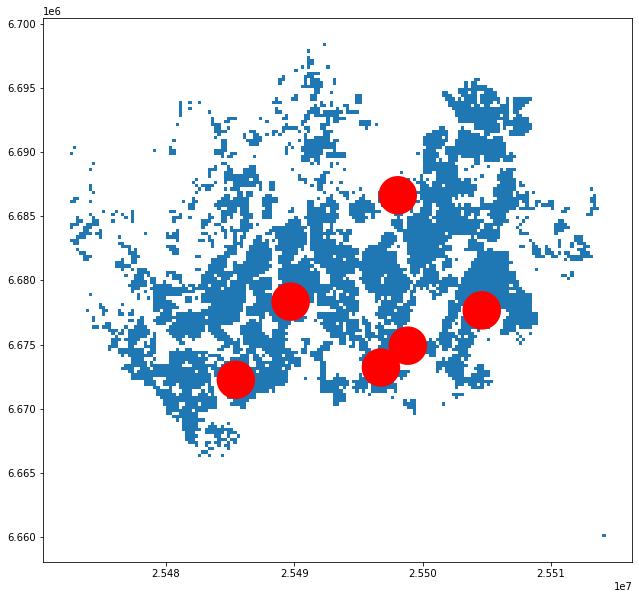

In [50]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(20,10))

# plot population grid
pop.plot(ax= ax)

# Plot shoping centers
geodata.plot(ax=ax, color='red', markersize=5)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

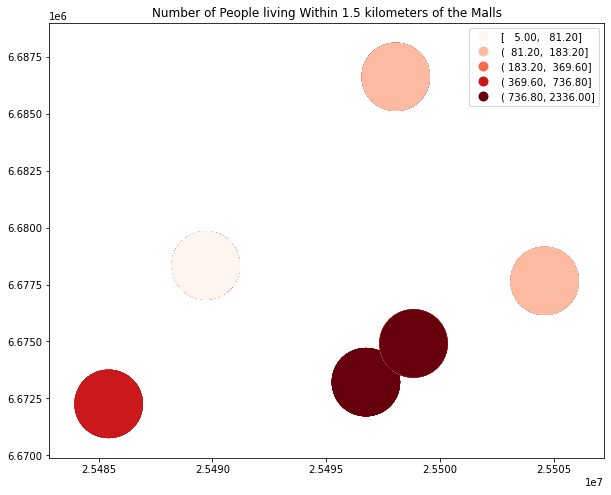

In [51]:
# lets create another one
fig, ax = plt.subplots(figsize=(10,8))

# Plot the points with population info
join.plot(ax=ax, column='POP18', cmap='Reds', markersize=1, scheme='quantiles', legend= True);

#Add title
plt.title ("Number of People living Within 1.5 kilometers of the Malls")

# Remove white space around the figure
plt.tight_layout

**Reflections:**
    
- How challenging did you find problems 1-3 (on scale to 1-5), and why?
- What was easy?
- What was difficult?

YOUR ANSWER HERE

Well done! Now you can continue to [problem 4](Exercise-3-Problem-4.ipynb)